Apply Model to some inputs Learn how:

Load a saved Model
Select inputs
Apply Model to inputs (Predict)

Import packages

In [33]:
#numpy: Numeric library
import numpy as np 
#graphics
from matplotlib import pyplot as plt

#tensorflow: use some TF tools
import tensorflow as tf
#Keras: Deep learning API. In TF 2.x, it is included in TF
from tensorflow import keras
#Import Dense layer
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import Model
#Optimizers: SGD (Stochastic Gradien Descent)
#from tensorflow.keras.optimizers import SGD as sgd

#import data set MNIST
from tensorflow.keras.datasets import mnist

Some verifications

Import MNIST data set
60000 training examples
10000 validation examples
1 example = 28 * 28 matrix (image with 28 * 28 pixels)


In [34]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()


Process & Prepare data
Flattening Input data:
Input data (x_train[i]) should be a vector of real values
- From shape (60000, 28, 28) to shape (60000, 28 * 28)
- Convert to float32 (default is uint8, which python will convert to float64) (flaot 32 will take less memory)

In [35]:
#use numpy reshape
x_train = np.reshape(X_train, (60000, 28 * 28)).astype('float32')
x_valid = np.reshape(X_valid, (10000, 28 * 28)).astype('float32')

Prepare Data (2)
divide by 255, so the values will range from 0 to 1


In [36]:
#print(x_train)
x_train /=  255
x_valid /=  255

Load Model

In [37]:
from tensorflow.keras.models import load_model

#load Model
folder = "logs/crossEntropyReLu2LayersWI/20200229-180923/"
model = load_model(folder + 'model_all.h5')


Select some inputs

In [72]:
#print(x_train[0])
size = 100
indexes = np.random.randint(0, y_valid.size-1, size=size)
tf.print("indexes:", indexes)
x = np.array([x_valid[i] for i in indexes])
X = np.array([X_valid[i] for i in indexes])
y = np.array([y_valid[i] for i in indexes])
tf.print(x.shape)
tf.print(y.shape)
# x = np.array([x_train[0], x_train[1], x_train[4566]])
# y = np.array([y_train[0], y_train[1], y_train[4566]])


indexes: array([1698,  124, 8218, 2619, 7898, 2269, 8280, 3134,  460, 1524, 8236,
       5807, 7031, 3437, 1379,  869, 4763, 2987,  117, 3001, 5714, 4193,
       1426, 5525, 1844, 6694, 7004, 7429, 5357,  900, 2992, 3298, 8766,
       5065, 6357, 5097, 5293,  605, 6369, 9692, 5542, 5860, 6456,  613,
       7253, 1970, 3961, 5503, 5022,  810, 4596, 3803, 6969, 8095,  724,
       3360, 4451,  109, 4561, 5672, 6691, 5962, 5127, 4034, 3064, 1400,
       2436, 2825, 7254,  820, 7738, 7067, 4147, 8707, 2162, 6196, 2154,
        176, 6025, 4768, 9645, 5220, 4804, 8621, 4969, 7335,  150,  980,
       5120, 6261, 2655, 5679, 2802, 6205, 5900, 9208, 3693, 3443,  350,
       7116])
(100, 784)
(100,)


Predict

In [73]:
 
#predict
y_predicted = model.predict_classes(x)


Print Prediction results

In [63]:
#print prediction results
#tf.print("y:", y)
#tf.print("predicted classes", y_predicted)

In [74]:
#check if prediction is valid
comparison = y == y_predicted
equal_arrays = comparison.all()

#prints True if All is OK
print(equal_arrays)

#print not predicted indexes
diff = y - y_predicted
 
indexes_false = np.array([i for i in np.arange(diff.size) if diff[i] != 0])
print("Not predicted indexes:", indexes_false)
print("Not predicted y:", [y[i] for i in indexes_false])
print("Not predicted y_predicted:", [y_predicted[i] for i in indexes_false])

False
Not predicted indexes: [ 8 19 39]
Not predicted y: [5, 9, 9]
Not predicted y_predicted: [9, 8, 7]


In [75]:
#Accuracy
acc =  1- indexes_false.size/size
print("Accuracy = ", acc)

Accuracy =  0.97


In [79]:
 
np.array(indexes_false)

array([ 8, 19, 39])

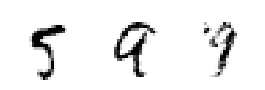

In [81]:
plt.figure(figsize=(5,5))
for k in  np.arange(np.array(indexes_false).size):
    plt.subplot(3, 4, k+1)
    plt.imshow(X[indexes_false[k]], cmap="Greys")
    plt.axis('off')
plt.tight_layout()
plt.show()

End